#### Single-Index Model
- The Single Index Model (Sim)
- A Regression Equation: 𝑅_𝑖(𝑡)= 𝛼_𝑖+𝛽_𝑖 𝑅_𝑀 (𝑡)+𝑒_𝑖 (𝑡)
- Ri(t): The Excess Return of Security 'i'
- Alpha(𝛼): Expected Excess Return when the Market Excess Return is equal to 0.
- Beta(𝛽): sensitivity of security i's returns to changes in return of the market
- 𝑅_𝑀 (𝑡): Expected Excess Return of the Market(SP&500)
- 𝑒_𝑖 (𝑡): Firm-Specific surprise


In [3]:
import warnings
warnings.filterwarnings("ignore")

# statsmodels for regression
import statsmodels.api as sm

# pandas and numbpy
import pandas as pd
import numpy as np

# config
from tools.config import load_config

# yfinance
import yfinance as yf

# plots
import seaborn as sns
import matplotlib.pyplot as plt






class SimExample:
    """
    A class to show a example of the Single Index Model.
    """
    def __init__(self, config: dict):
        """
        Initializing Sim example class.
        
        Args:
            config(dict): a configuration file.
        
        """
        self.config = config or load_config()
        
    def get_returns_from_yfinance(self) -> pd.DataFrame:
        """
        returns from closing stock && market prices from yfinance.
        
        Returns:
            all_returns (pd.Dataframe): the pct_change in closing stock_prices.
        """
        # stock prices from yfinance
        all_prices = yf.download(tickers=self.config["all_prices"],start=self.config['start_date'],end=self.config['end_date'])['Close']
        

        
        # returns of stocks and sp500(Market Returns)
        
        all_returns = all_prices.pct_change().dropna()
        
      
        
        return all_returns
    
    
    def sim_model(self) -> None:
        """"
        The regression equation for the Single Index Model. With a plot of all assets compared to the Security Market Line.
        """
        all_returns= self.get_returns_from_yfinance()
        
        
        
        
        # tickers for the for loop
        
        tickers = self.config['all_prices']

        sp500_ticker = self.config["sp500_ticker"]
        
        for ticker in tickers:
            asset_returns = all_returns[ticker]
            market_returns = all_returns[sp500_ticker]

            X = sm.add_constant(market_returns)
            y = asset_returns
            model = sm.OLS(exog=X,endog=y).fit()
            
            # single index model
            model = sm.OLS(exog=sm.add_constant(market_returns),endog=asset_returns).fit()
            results = model.summary()
            print(results)
           
            plt.figure(figsize=(12,6))
            sns.scatterplot(x=market_returns, y=asset_returns, label=ticker)
            sns.lineplot(x=market_returns, y=model.fittedvalues, color='red', label='Security Market Line')
                
            plt.title(f'Single Index Model for {ticker}')
            plt.xlabel('Market Excess Return')
            plt.ylabel(f'{ticker} Excess Return')
            plt.legend()
            plt.show()

            
        
        


        
        
        

- This is going to return all assets compared to the SP&500 with a ANOVA table and plots of each individual asset compared to the SP&500
- This will be long.

[*********************100%***********************]  21 of 21 completed


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          8.07e-233
Time:                        13:12:25   Log-Likelihood:                 3811.5
No. Observations:                1254   AIC:                            -7619.
Df Residuals:                    1252   BIC:                            -7609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.590      0.5

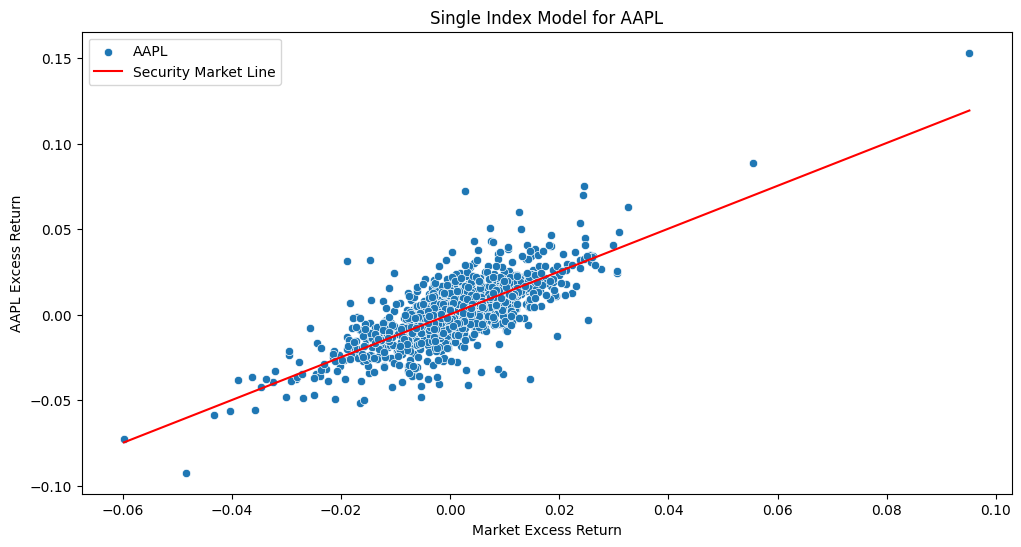

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1746.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          1.23e-239
Time:                        13:12:25   Log-Likelihood:                 3939.2
No. Observations:                1254   AIC:                            -7874.
Df Residuals:                    1252   BIC:                            -7864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.604      0.5

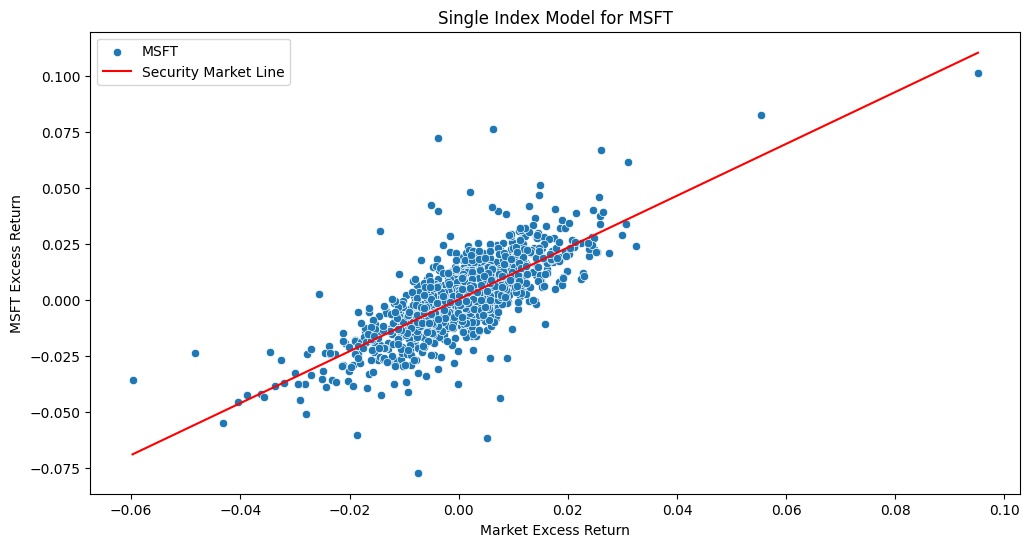

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1215.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          1.32e-186
Time:                        13:12:25   Log-Likelihood:                 2930.3
No. Observations:                1254   AIC:                            -5857.
Df Residuals:                    1252   BIC:                            -5846.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.001      2.238      0.0

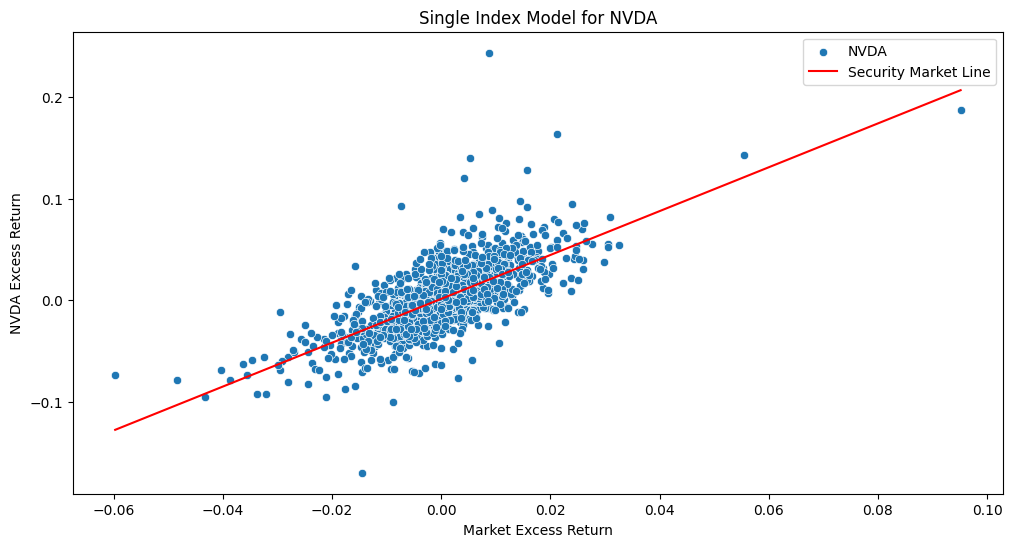

                            OLS Regression Results                            
Dep. Variable:                     GM   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     504.1
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           4.31e-94
Time:                        13:12:26   Log-Likelihood:                 3136.1
No. Observations:                1254   AIC:                            -6268.
Df Residuals:                    1252   BIC:                            -6258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.051e-06      0.001      0.007      0.9

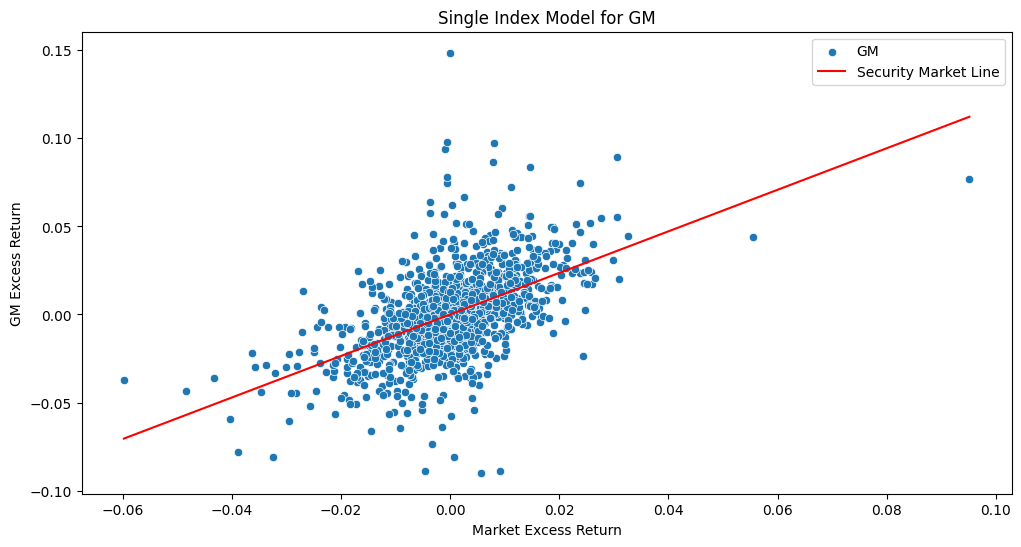

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     485.8
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           3.11e-91
Time:                        13:12:26   Log-Likelihood:                 3053.7
No. Observations:                1254   AIC:                            -6103.
Df Residuals:                    1252   BIC:                            -6093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.198      0.8

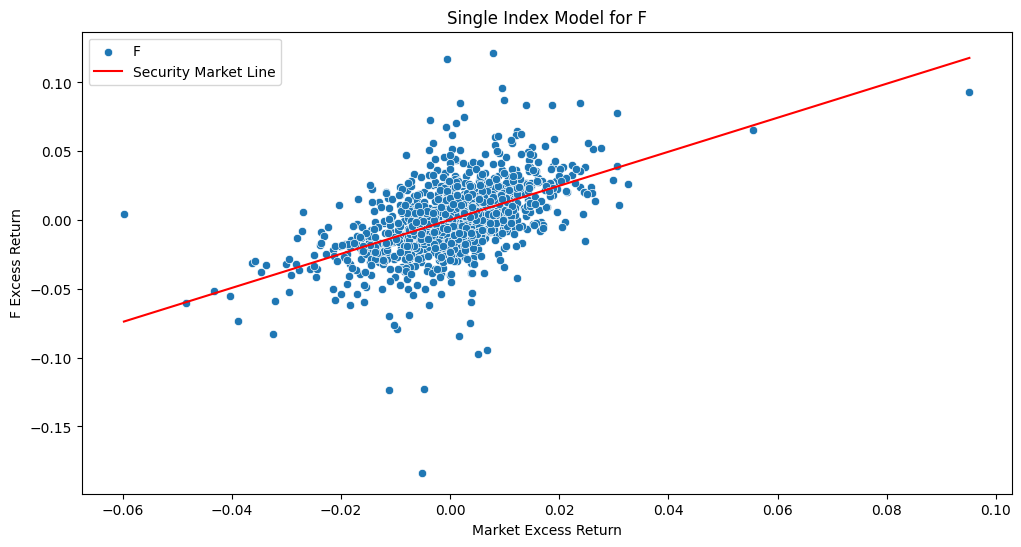

                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           5.53e-43
Time:                        13:12:26   Log-Likelihood:                 3754.5
No. Observations:                1254   AIC:                            -7505.
Df Residuals:                    1252   BIC:                            -7495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.412      0.1

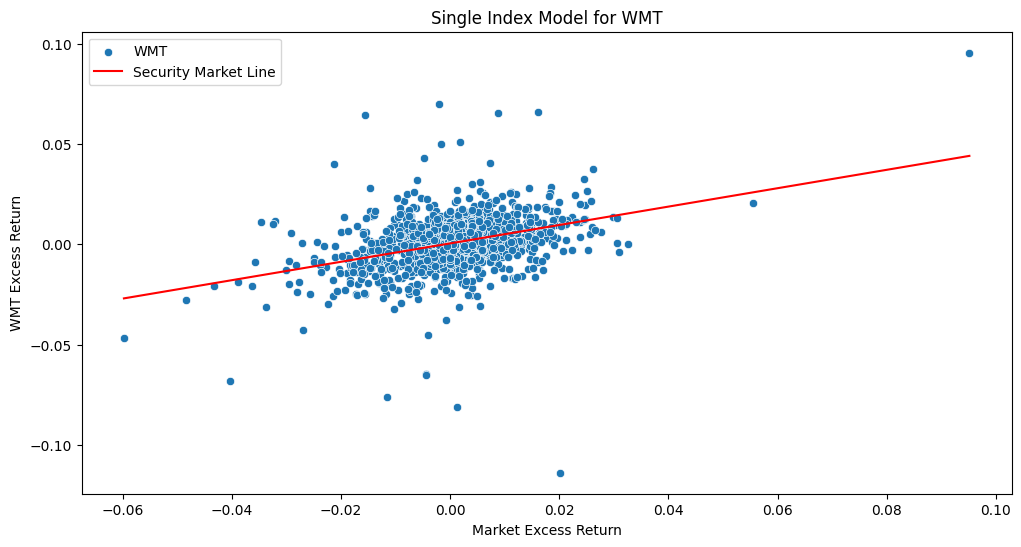

                            OLS Regression Results                            
Dep. Variable:                    MCD   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     260.0
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           2.73e-53
Time:                        13:12:26   Log-Likelihood:                 4019.2
No. Observations:                1254   AIC:                            -8034.
Df Residuals:                    1252   BIC:                            -8024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.716      0.4

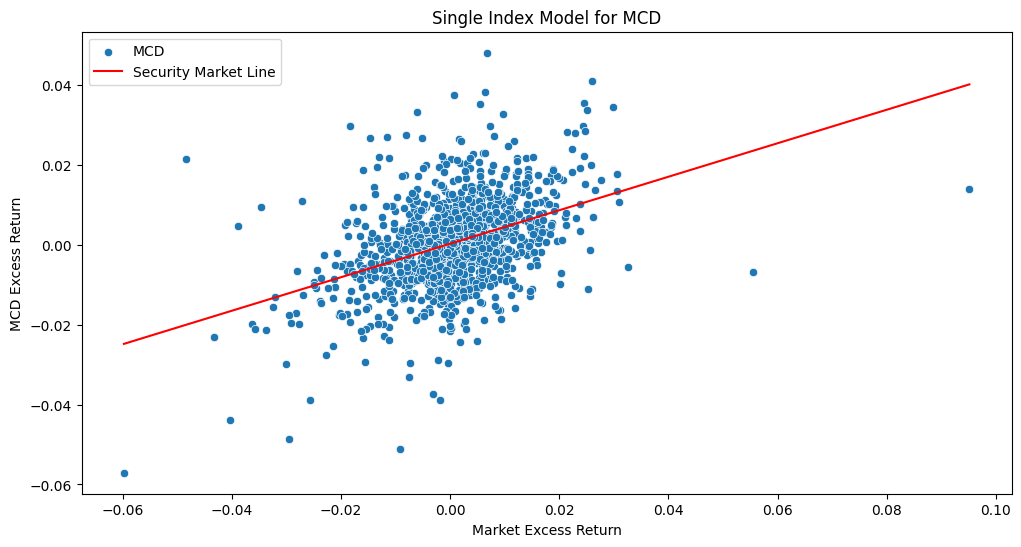

                            OLS Regression Results                            
Dep. Variable:                   SBUX   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     535.8
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           5.75e-99
Time:                        13:12:27   Log-Likelihood:                 3378.1
No. Observations:                1254   AIC:                            -6752.
Df Residuals:                    1252   BIC:                            -6742.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -0.796      0.4

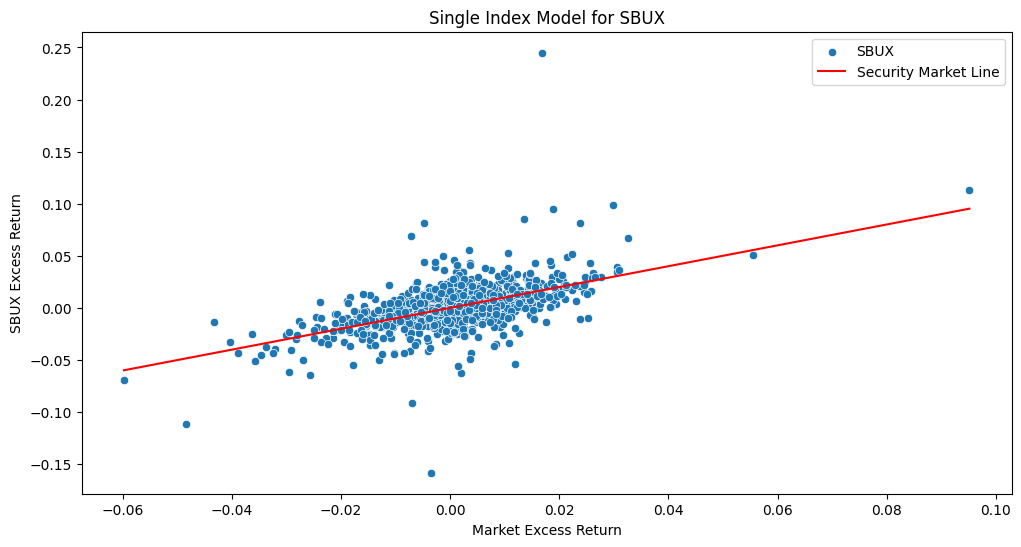

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     594.3
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          9.90e-108
Time:                        13:12:27   Log-Likelihood:                 2550.6
No. Observations:                1254   AIC:                            -5097.
Df Residuals:                    1252   BIC:                            -5087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.270      0.7

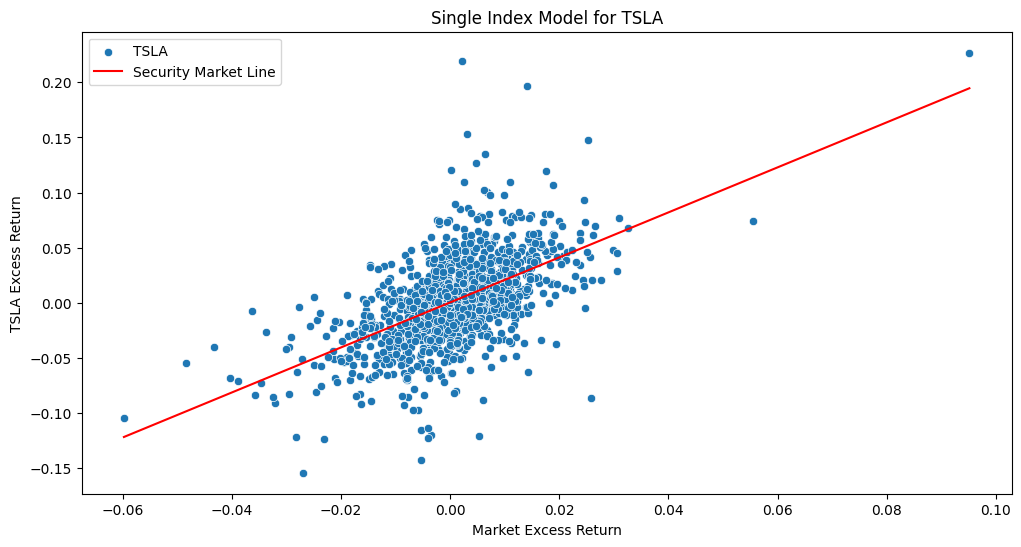

                            OLS Regression Results                            
Dep. Variable:                  GOOGL   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     1142.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          2.07e-178
Time:                        13:12:27   Log-Likelihood:                 3563.7
No. Observations:                1254   AIC:                            -7123.
Df Residuals:                    1252   BIC:                            -7113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.249      0.2

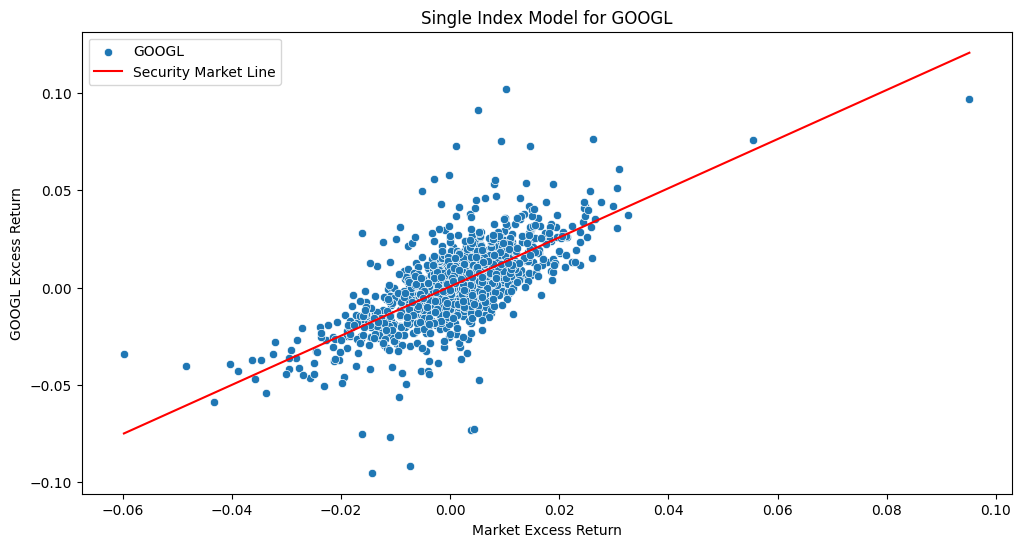

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.655e+05
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:12:27   Log-Likelihood:                 7614.8
No. Observations:                1254   AIC:                        -1.523e+04
Df Residuals:                    1252   BIC:                        -1.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.199e-05   1.58e-05      3.293      0.0

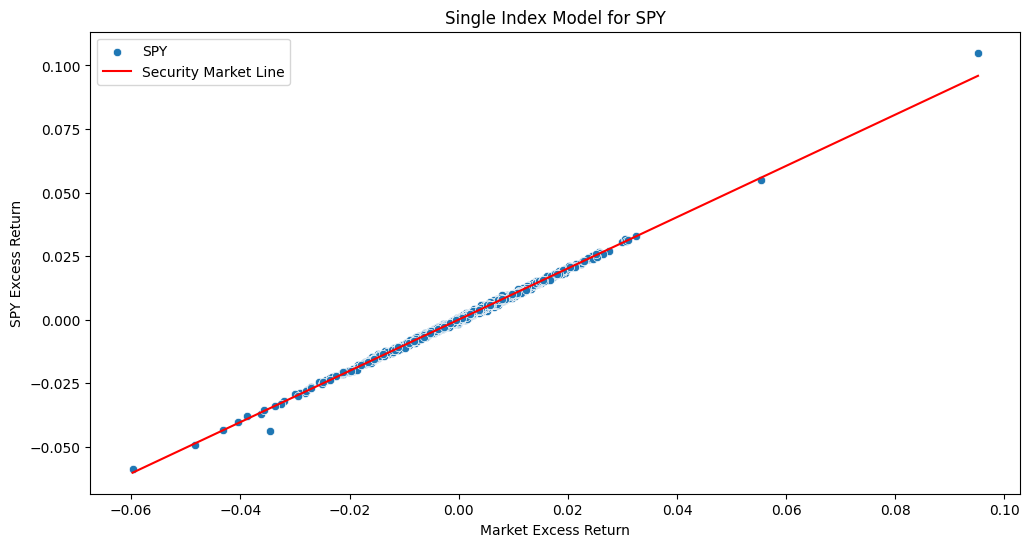

                            OLS Regression Results                            
Dep. Variable:                    QQQ   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:12:27   Log-Likelihood:                 4975.1
No. Observations:                1254   AIC:                            -9946.
Df Residuals:                    1252   BIC:                            -9936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.128e-06      0.000      0.047      0.9

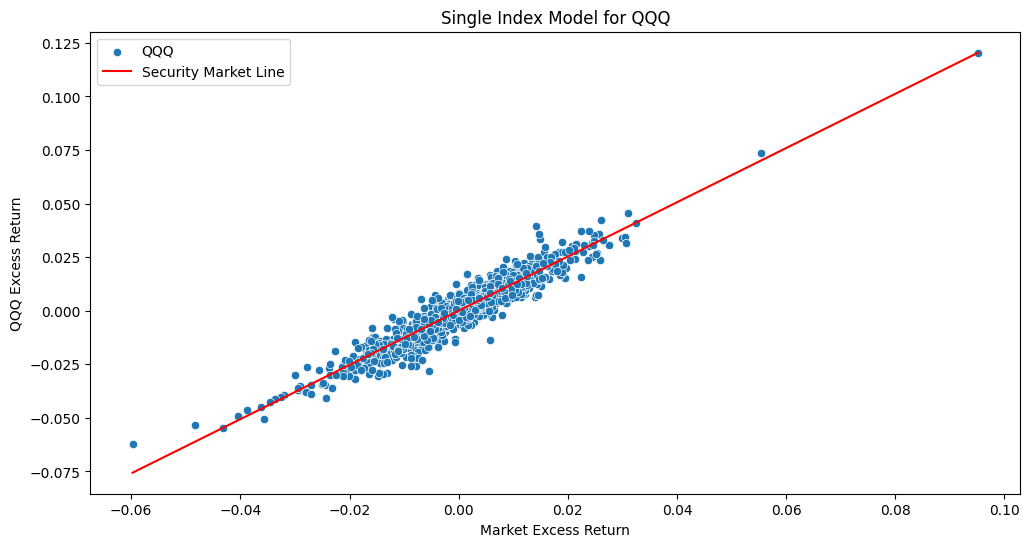

                            OLS Regression Results                            
Dep. Variable:                    VTI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.154e+05
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:12:28   Log-Likelihood:                 6717.2
No. Observations:                1254   AIC:                        -1.343e+04
Df Residuals:                    1252   BIC:                        -1.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.152e-06   3.23e-05      0.190      0.8

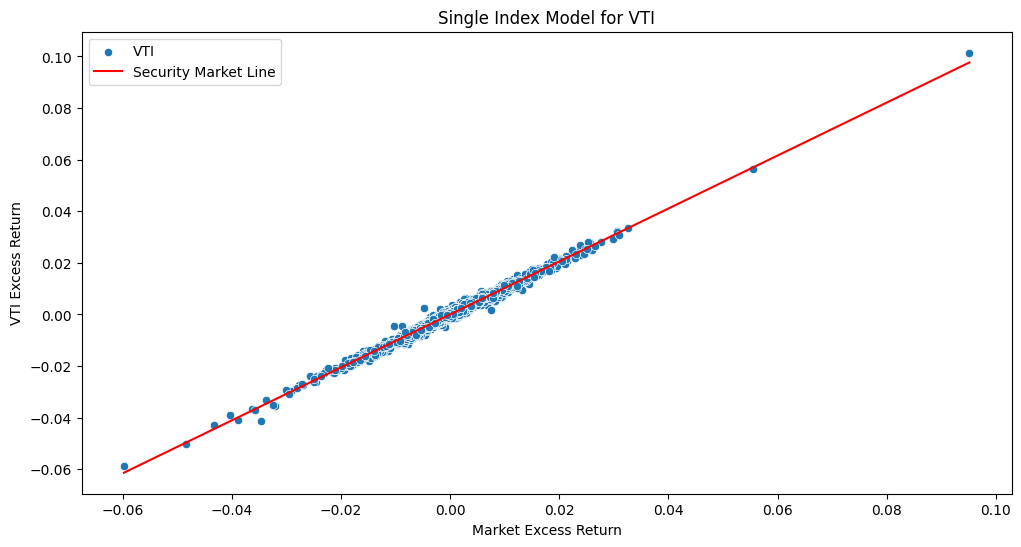

                            OLS Regression Results                            
Dep. Variable:                    VOO   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.290e+05
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:12:28   Log-Likelihood:                 7913.4
No. Observations:                1254   AIC:                        -1.582e+04
Df Residuals:                    1252   BIC:                        -1.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.055e-05   1.24e-05      4.867      0.0

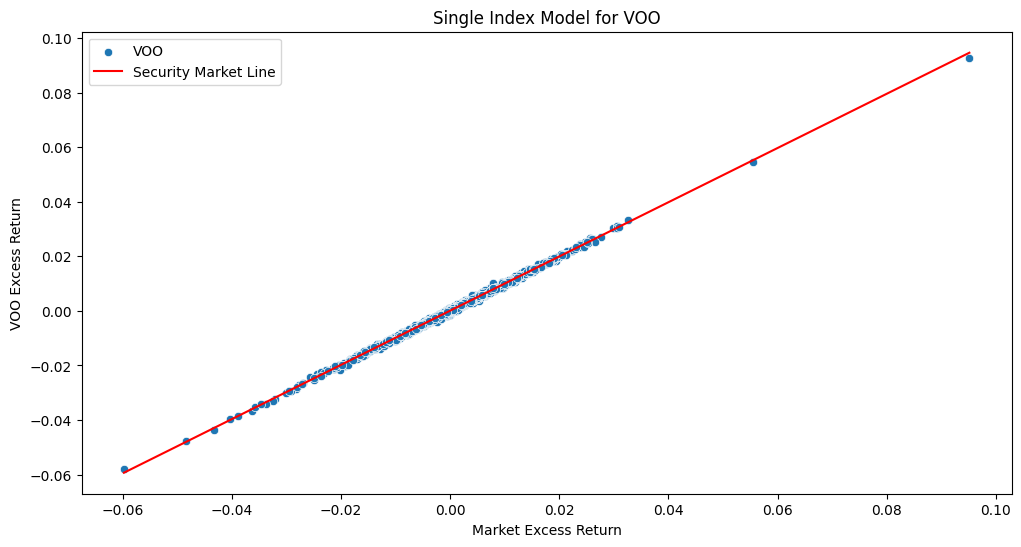

                            OLS Regression Results                            
Dep. Variable:                   ARKK   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1476.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          5.20e-214
Time:                        13:12:28   Log-Likelihood:                 3120.9
No. Observations:                1254   AIC:                            -6238.
Df Residuals:                    1252   BIC:                            -6228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -1.618      0.1

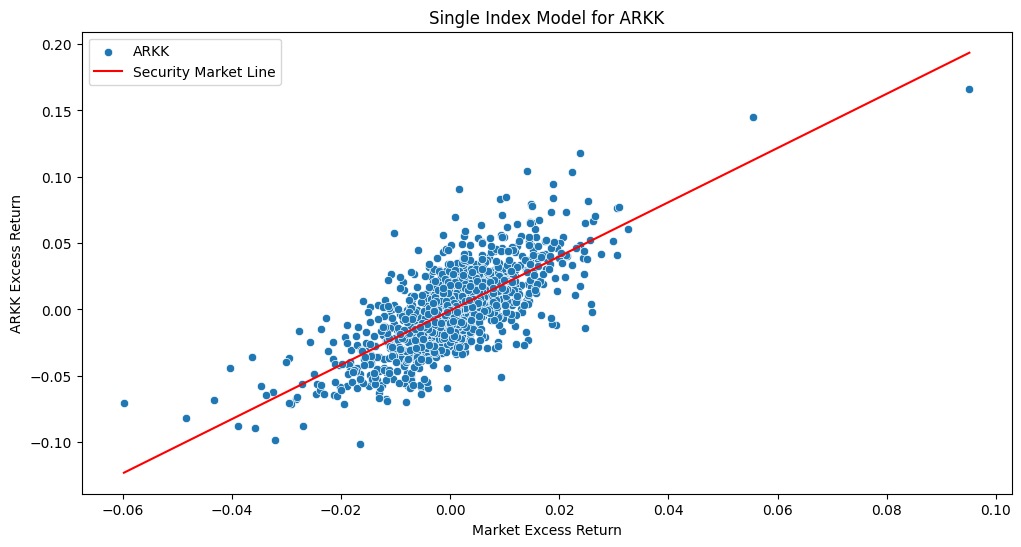

                            OLS Regression Results                            
Dep. Variable:                    IWM   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2899.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:12:28   Log-Likelihood:                 4286.9
No. Observations:                1254   AIC:                            -8570.
Df Residuals:                    1252   BIC:                            -8559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.129      0.2

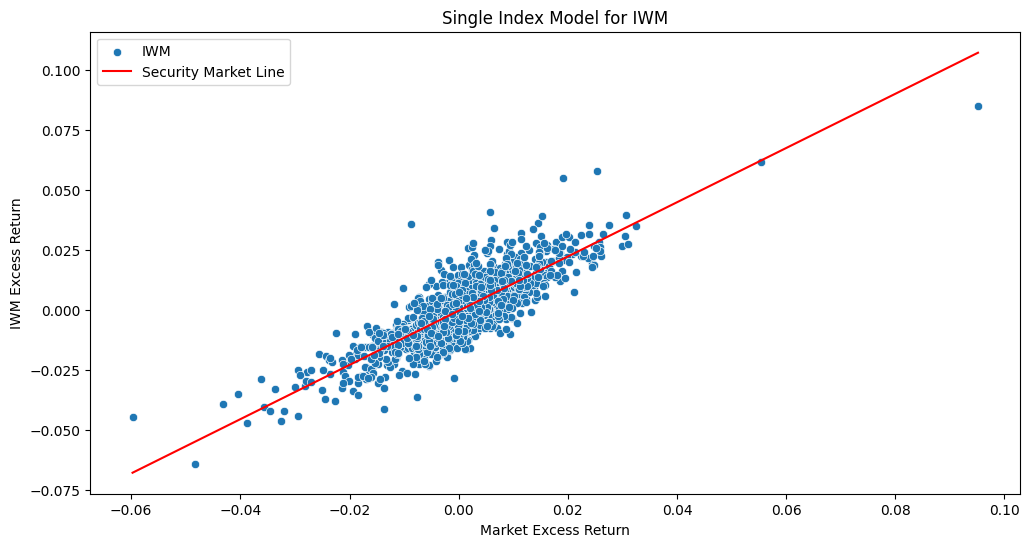

                            OLS Regression Results                            
Dep. Variable:                    DIA   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     6849.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:12:28   Log-Likelihood:                 5266.5
No. Observations:                1254   AIC:                        -1.053e+04
Df Residuals:                    1252   BIC:                        -1.052e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.332e-05      0.000      0.324      0.7

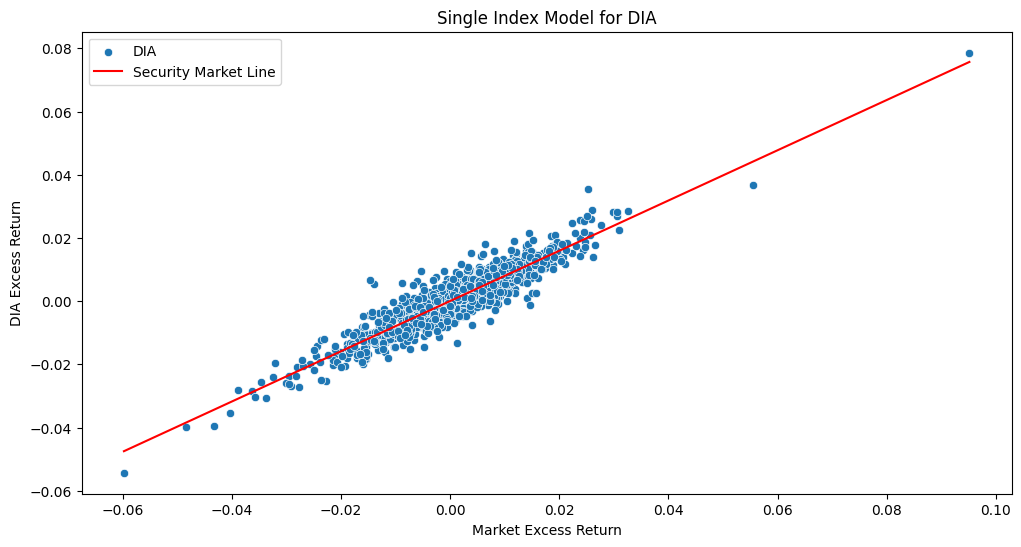

                            OLS Regression Results                            
Dep. Variable:                    XLF   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2196.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          1.01e-277
Time:                        13:12:29   Log-Likelihood:                 4410.3
No. Observations:                1254   AIC:                            -8817.
Df Residuals:                    1252   BIC:                            -8806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.672      0.5

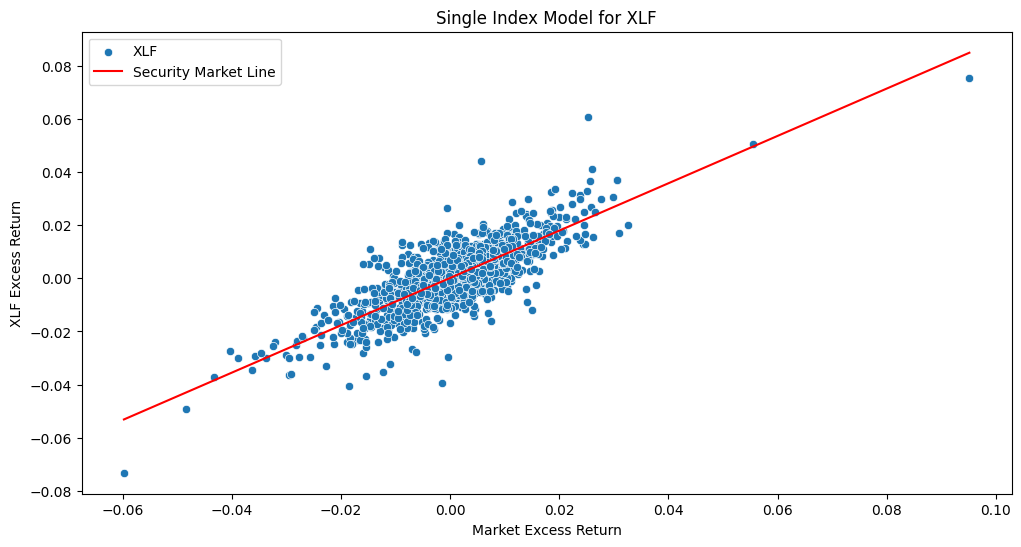

                            OLS Regression Results                            
Dep. Variable:                    XLK   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     7848.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:12:29   Log-Likelihood:                 4688.6
No. Observations:                1254   AIC:                            -9373.
Df Residuals:                    1252   BIC:                            -9363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.727e-05      0.000      0.475      0.6

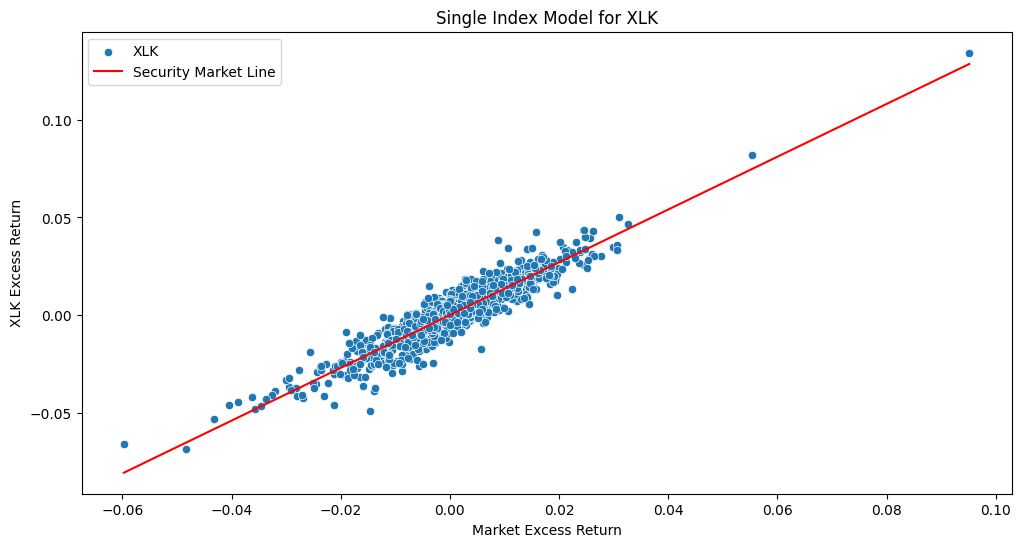

                            OLS Regression Results                            
Dep. Variable:                    EFA   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2280.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):          3.02e-284
Time:                        13:12:29   Log-Likelihood:                 4629.2
No. Observations:                1254   AIC:                            -9254.
Df Residuals:                    1252   BIC:                            -9244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.913e-05      0.000     -0.171      0.8

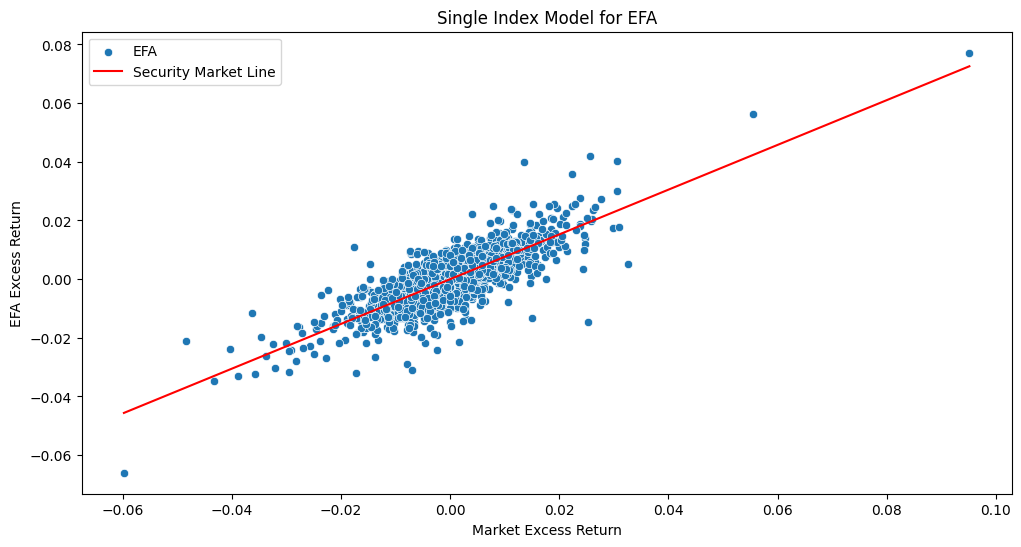

                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.591e+33
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:12:29   Log-Likelihood:                 47376.
No. Observations:                1254   AIC:                        -9.475e+04
Df Residuals:                    1252   BIC:                        -9.474e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.135e-19   2.68e-19      0.797      0.4

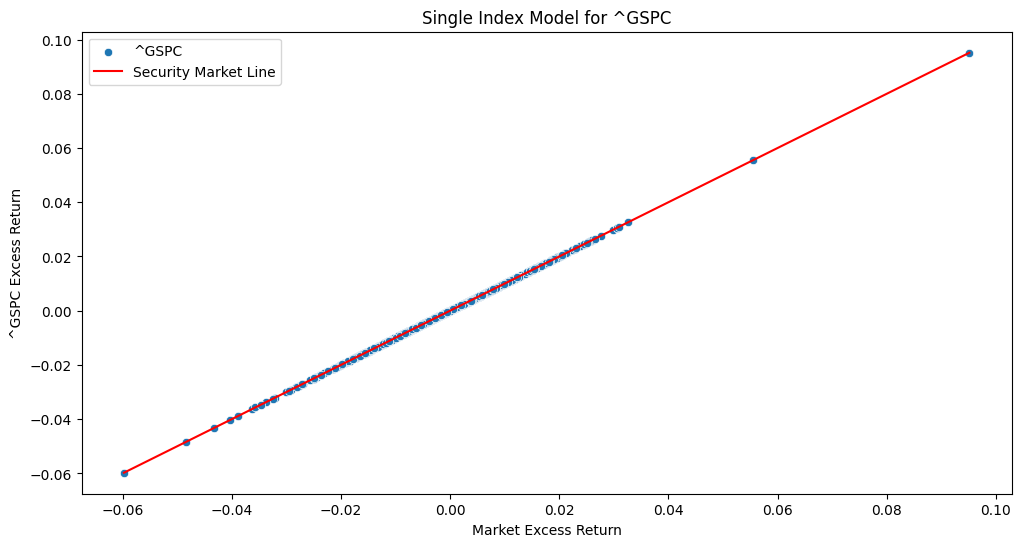

In [4]:
# run Single-Index Model
obj = SimExample(load_config())
obj.sim_model()

- Notice Above how the SP&500 has a R2 Score of 100% and all residuals are perfectly on the Security Market Line(SML)

#### Other Metrics for Single Index Model
- Market Index Risk: The Variance of the Market. In this case, the variance of returns from the SP&500. Equation: 𝜎_𝑀^2.
- Firm-Specific Risk: the variance of the residuals for firm(i). Equation: 𝜎^2 (𝑒_𝑖 ).
- Systematic-Risk: This is unavoidable risk. The affects the entire market for all firms. Equation: 𝛽_𝑖^2 𝜎_𝑀^2.
- Total-Risk: Systematic-Risk + Firm-Specific Risk.


In [5]:
# loading in all returns and market returns first
config = load_config()
all_returns = obj.get_returns_from_yfinance()

#tickers
tickers = config['all_prices']
sp500_ticker = config['sp500_ticker']


# dictionaries for betas,alphas, systematic-risk, firm-specific risk, total_risk, Adjusted-Betas, error-terms, etc.

betas = {}
alphas = {}
error_terms = {}
adjusted_betas = {}
systematic_risks = {}
firm_specific_risks = {}
total_risks = {}


results = []

for ticker in tickers:
    asset_returns = all_returns[ticker]
    market_returns = all_returns[sp500_ticker]
    X = sm.add_constant(market_returns)
    y = asset_returns
    model = sm.OLS(exog=X,endog=y).fit()
    alphas[ticker] = model.params.const
    betas[ticker] = model.params.iloc[1]
    error_terms[ticker] = model.resid
    
    # adjusted betas
    adjusted_betas[ticker] = (2/3) * betas[ticker] + (1/3) * 1
    
    
    # market index risk
    market_index_risk = np.var(market_returns)
    
    # firm-specific risk
    firm_specific_risks[ticker] = np.var(asset_returns)
    
    # Systematic Risk
    systematic_risks[ticker] = (betas[ticker]**2) * market_index_risk
    
    # total risk
    total_risks[ticker] = systematic_risks[ticker] + firm_specific_risks[ticker]
    
    results.append({
        "betas":betas,
        "alphas":alphas,
        "adjusted betas": adjusted_betas,
        "systematic risk's": systematic_risks,
        "Firm-Specific Risk's": firm_specific_risks,
        "market-index-risk":market_index_risk,
        "total-risks":total_risks
        
    })
    
    


[*********************100%***********************]  21 of 21 completed


- All betas, alphas, adjusted betas, systematic-risk market-index risk, and total risk for every single asset.

In [6]:
# dictionary containing SIM Metrics
results

[{'betas': {'AAPL': np.float64(1.253635322329515),
   'MSFT': np.float64(1.1570781075481296),
   'NVDA': np.float64(2.1579692610800483),
   'GM': np.float64(1.1796485199445252),
   'F': np.float64(1.2366798774531818),
   'WMT': np.float64(0.4582915700392249),
   'MCD': np.float64(0.41893862540833565),
   'SBUX': np.float64(1.002746458524551),
   'TSLA': np.float64(2.0430725768208693),
   'GOOGL': np.float64(1.2624276993586256),
   'SPY': np.float64(1.0077334444005177),
   'QQQ': np.float64(1.2649757731557383),
   'VTI': np.float64(1.0264752105628108),
   'VOO': np.float64(0.9939151322563118),
   'ARKK': np.float64(2.043410821113523),
   'IWM': np.float64(1.1300501950393924),
   'DIA': np.float64(0.7952244420488015),
   'XLF': np.float64(0.8913834038394879),
   'XLK': np.float64(1.3496078823987732),
   'EFA': np.float64(0.762751911850748),
   '^GSPC': np.float64(0.9999999999999991)},
  'alphas': {'AAPL': np.float64(0.0001932367608987773),
   'MSFT': np.float64(0.0001786729191527189),
  